In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#import .pkl file since original .cvs was preprocessed on milk_qualityDTC.ipynb
#read DataFrame from pickle file

milk= pd.read_pickle("preprocessed_milk.pkl")

#checking if all info are still in the DataFrame
#print(milk.info())

In [4]:
# 6. Modello di Machine Learning
# 1. Scelta del modello da utilizzare - choosing model SVC perchè il DecisionTree era al 0.15 di accuratezza

from sklearn.svm import SVC

# adding in the head --> from sklearn.model_selection import train_test_split
# adding here on top --> from sklearn.svm import SVC

#splitting dataset into train and test set 
#  giving "X" (capitol) to features and "y" to label
X = milk[['pH', 'Temprature', 'Taste', 'Fat ', 'Turbidity', 'Colour', 'Odor']]
y = milk['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26, test_size = 0.15)

# 2. Creating model and learning on the taaining set -- Addestramento sul training set
model_svc = SVC(kernel='poly')
model_svc.fit(X_train, y_train)

#printing learning status
print('Il modello è stato addestrato')

# 3. Predizioni sul test set delle features ******chiedere il significato*****
y_pred = model_svc.predict(X_test)
print(X_test)

Il modello è stato addestrato
            pH  Temprature  Taste  Fat   Turbidity    Colour  Odor
677   0.538462    0.071429    1.0   1.0        0.0  1.000000   0.0
182   0.553846    0.053571    1.0   1.0        1.0  1.000000   1.0
952   0.584615    0.000000    0.0   0.0        1.0  0.000000   0.0
401   0.553846    0.053571    1.0   1.0        0.0  1.000000   0.0
385   0.538462    0.035714    0.0   1.0        0.0  1.000000   0.0
...        ...         ...    ...   ...        ...       ...   ...
543   1.000000    0.000000    1.0   0.0        1.0  1.000000   1.0
252   0.553846    0.071429    1.0   1.0        0.0  1.000000   0.0
111   0.553846    0.160714    1.0   1.0        1.0  0.666667   0.0
424   0.400000    0.285714    0.0   1.0        1.0  1.000000   1.0
1073  0.400000    0.285714    0.0   1.0        1.0  1.000000   1.0

[104 rows x 7 columns]


In [ ]:
# 7. Valutazione del modello
# 1. Calcolare l’accuratezza del modello tra le labels ed il test set

# import library for valutations metrics

from sklearn.metrics import classification_report, confusion_matrix

print(f'Classification_report: \n {classification_report(y_test, y_pred )}')



0.9038461538461539
Classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.97      0.95      0.96        40
           2       0.94      0.81      0.87        37

    accuracy                           0.90       104
   macro avg       0.90      0.91      0.90       104
weighted avg       0.91      0.90      0.90       104



<Axes: >

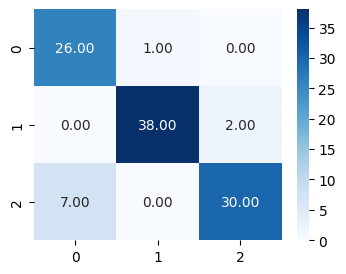

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(conf, cmap='Blues', fmt=".2f", annot=True)

[]

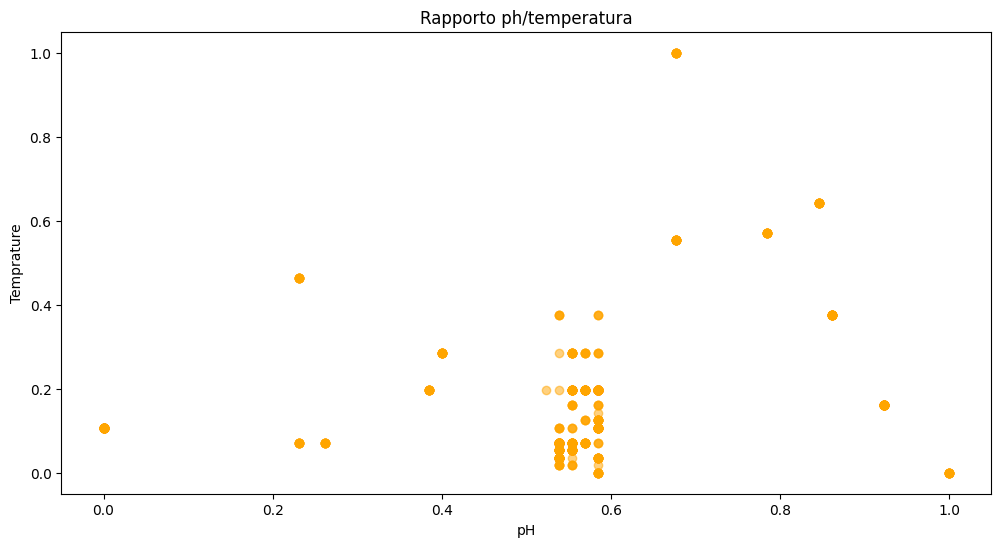

In [ ]:
#plot some report
plt.figure(figsize=(12, 6))

plt.scatter(milk["pH"], milk["Temprature"], color='orange', alpha=0.5)

plt.xlabel("pH")
plt.ylabel("Temprature")
plt.title("Rapporto ph/temperatura")
plt.plot()

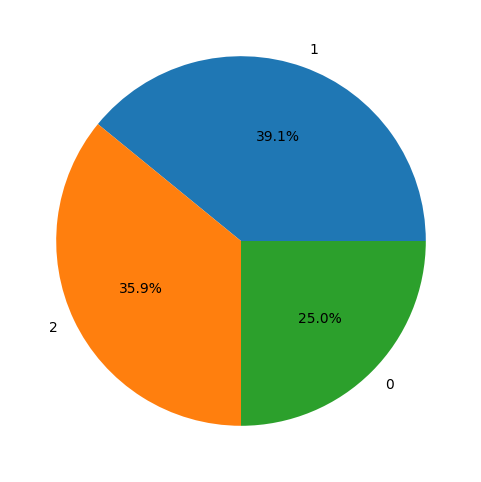

In [7]:
quality = milk["quality"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(quality, labels=quality.index, autopct='%1.1f%%', startangle=0 )

plt.show()

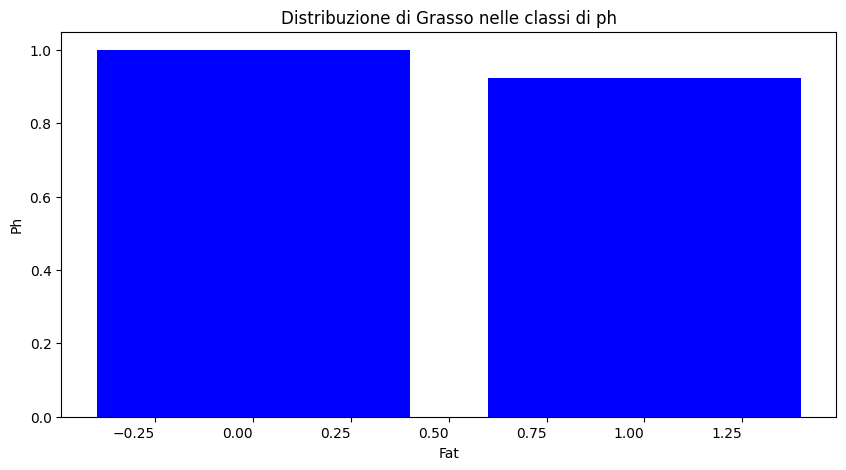

In [8]:
ph_fat_class = milk[['pH', "Fat "]]
n_ph_fat = ph_fat_class.sort_values(by="Fat ", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(n_ph_fat["Fat "], n_ph_fat["pH"], color='blue')
plt.xlabel("Fat")
plt.ylabel("Ph")
plt.title("Distribuzione di Grasso nelle classi di ph")

plt.xticks(rotation=0, ha='right')

plt.show()